In [12]:
# Import necessary functions
import numpy as np
import matplotlib.pyplot as plt
import math

### Calculation behind the code
Newton's 2nd law states:
$$m \frac{d^2 x}{dt^2}=\Sigma F$$
In this situation, there is a spring force, drag force, and driving force. Incorporating this, we get
$$ \frac{d^2 x}{dt^2} = -\frac{k}{m}x-\frac{1}{2m}\rho C_D A v^2 \hat{v} + \frac{F_0}{m} \cos (\omega_d t)$$
To calculate the oscillator's position, we use the Euler-Cromer's method, which states:
$$v_{n+1}=v_n + h a_n$$
$$x_{n+1} = x_n + h v_{n+1}$$
where $h$ is the tiny steps in time. Hence, we can obtain the oscillator's position by 
$$v_{n+1}=v_n + h \left( (-\omega_0^2)x-\frac{1}{2}Cv|v|+\frac{F_0}{m} \cos (\omega_d t) \right)$$
$$x_{n+1}=x_n+h v_{n+1}$$
where $\omega_0 = \sqrt{\frac{k}{m}}$ and $C=\frac{\rho C_D A}{m}$.

### Initial states and other parameters
In the following function, $\omega_0$ and $\omega_d$ are set to $2 \pi$ as suggested in the problem. Hence, the initial states that we compare in the final plot is
1. $x_0$: the initial position of the oscillator.
2. $v_0$: the initial velosity of the oscillator.
3. $F_0/m$: the driving force divided by the oscillator's mass.

In [13]:
def EC_drag (inits, a=0, b=3*0.90, N=1000):
    """
    This function returns the position of an object going through driven drag damping oscillation. 
    Inputs:
        inits = [x0, v0, F0m], where
            x0 -- Initial position of the oscillator [m]
            v0 -- Initial velocity of the oscillator [m/s]
            F0m -- Initial driving force divided by mass of oscillator [N/kg]
        a (optional) -- start time [s]
        b (optional) -- final time [s]
        N (optional) -- number of steps to calculate between a and b
    """
    x0, v0, F0m = inits
    h=(b-a)/N  #Time step (calculted)

    x=x0     #Initial value of position with the unit of m.
    v=v0        #Initial value of the velocity with the unit of m/s.
    Fm = F0m #Initial value of the driving force divided by mass with the unit of N/kg
    w0 = 2*math.pi   #free-oscilation frequency with the unit of s^(-1)
    wd = 2*math.pi #driving frequency with the unit of s^(-1)
    C = 1 #Damping coefficient divided by mass (rho*C_D*A/m) with the unit of m^(-1)


    #Here, we have defined an empty array for x.
    xpoints=[]

    tp=np.linspace(a,b,N)

    for t in tp:
        xpoints.append(x)
        v=v+h*((-(w0)**2)*x-0.5*C*v*np.abs(v)+Fm*np.cos(wd*t))  # Calculate v_(n+1)
        x=x+v*h  #The Euler-Cromer method calculates x_(n+1) with x_n and v_(n+1)
    
    return xpoints

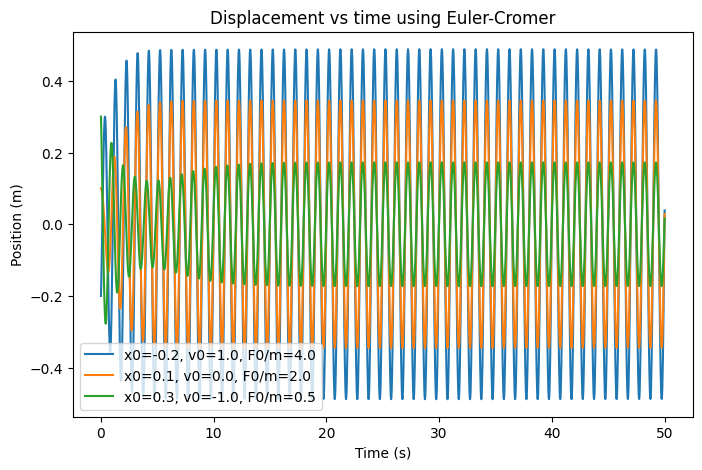

In [14]:
a=0
b=50
N=2000

tp=np.linspace(a,b,N)
inits = np.array([[-0.2, 1., 4.],
                  [0.1, 0, 2.],
                  [0.3, -1., 0.5]])

fig, ax = plt.subplots(figsize=(8,5))
for i in range(3):
    pos = EC_drag(inits[i],a,b,N)
    ax.plot(tp,pos, label=f"x0={inits[i,0]}, v0={inits[i,1]}, F0/m={inits[i,2]}")

plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Displacement vs time using Euler-Cromer')
plt.legend()
plt.show()